In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE


In [3]:
data = pd.read_csv('energydata_complete.csv',delimiter=',')
# data = data
data.head()
# print(data.shape)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
y = data.iloc[:,1]
X = data.drop('Appliances',axis = 1)
# X = X.drop('RH_6',axis=1)
X.head()


,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
from datetime import datetime
date = X.iloc[:,0]
NSM = []

def how_many_seconds_until_midnight():
    """Get the number of seconds until midnight."""
    for i in range(0,len(date)):
        n =  datetime.strptime(date[i],'%Y-%m-%d %H:%M:%S')
        NSM.append(((24 - n.hour - 1) * 60 * 60) + ((60 - n.minute - 1) * 60) + (60 - n.second))
    return NSM
how_many_seconds_until_midnight()

[25200,
 24600,
 24000,
 23400,
 22800,
 22200,
 21600,
 21000,
 20400,
 19800,
 19200,
 18600,
 18000,
 17400,
 16800,
 16200,
 15600,
 15000,
 14400,
 13800,
 13200,
 12600,
 12000,
 11400,
 10800,
 10200,
 9600,
 9000,
 8400,
 7800,
 7200,
 6600,
 6000,
 5400,
 4800,
 4200,
 3600,
 3000,
 2400,
 1800,
 1200,
 600,
 86400,
 85800,
 85200,
 84600,
 84000,
 83400,
 82800,
 82200,
 81600,
 81000,
 80400,
 79800,
 79200,
 78600,
 78000,
 77400,
 76800,
 76200,
 75600,
 75000,
 74400,
 73800,
 73200,
 72600,
 72000,
 71400,
 70800,
 70200,
 69600,
 69000,
 68400,
 67800,
 67200,
 66600,
 66000,
 65400,
 64800,
 64200,
 63600,
 63000,
 62400,
 61800,
 61200,
 60600,
 60000,
 59400,
 58800,
 58200,
 57600,
 57000,
 56400,
 55800,
 55200,
 54600,
 54000,
 53400,
 52800,
 52200,
 51600,
 51000,
 50400,
 49800,
 49200,
 48600,
 48000,
 47400,
 46800,
 46200,
 45600,
 45000,
 44400,
 43800,
 43200,
 42600,
 42000,
 41400,
 40800,
 40200,
 39600,
 39000,
 38400,
 37800,
 37200,
 36600,
 36000,
 

In [6]:
X = X.drop('date',axis = 1)
X['NSM'] = NSM
X.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,25200
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,24600
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,24000
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,23400
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,22800


### Splitting the data

In [8]:
X_train1, X_pretrain1, y_train1, y_pretrain1 = train_test_split(X, y, test_size=0.2)
print('X_train1 :',X_train1.shape)
print('X_pretrain :',X_pretrain1.shape)
# print(y_train1.shape)
# print(y_pretrain.shape)

X_train2, X_test, y_train2, y_test = train_test_split(X_train1, y_train1, test_size=0.2)
print('X_train2 :',X_train2.shape)
print('X_test :',X_test.shape)
# print(y_train1.shape)
# print(y_pretrain.shape)

X_train, X_val, y_train, y_val = train_test_split(X_train2, y_train2, test_size=0.2)
print('X_train :',X_train.shape)
print('X_val :',X_val.shape)

X_pretrain, X_pretest, y_pretrain, y_pretest = train_test_split(X_pretrain1, y_pretrain1, test_size=0.2)


print(X_pretrain.shape,X_pretest.shape,X_train.shape,X_val.shape,X_test.shape)

X_train1 : (15788, 28)
X_pretrain : (3947, 28)
X_train2 : (12630, 28)
X_test : (3158, 28)
X_train : (10104, 28)
X_val : (2526, 28)
(3157, 28) (790, 28) (10104, 28) (2526, 28) (3158, 28)


### Pre- training

In [9]:
scaler = StandardScaler()
scaler.fit(X_pretrain)
X_pretrain = scaler.transform(X_pretrain) 
X_pretest = scaler.transform(X_pretest)


In [10]:
pca = PCA()
pca.fit(X_pretrain)
X_pretrain = pca.transform(X_pretrain) 
X_pretest = pca.transform(X_pretest)






# print(X_pretrain)
# # rfe = RFE(estimator = rf_model, n_features_to_select = None, step = 1)
# # rfe.fit(X_pretrain,y_pretrain)
# # X_pretrain = rfe.transform(X_pretrain) 
# # X_pretest = rfe.transform(X_pretest)


In [11]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

### Models

In [12]:
mse = []
r2 = []
rmse_val = []
models = ['LinearRegression','Ridge','Lasso','DecisionTreeRegressor','SVR','SGD','GradientBoostingRegressor','RandomForestRegressor']

## Linear Regression
lm = LinearRegression()
lm.fit(X_pretrain,y_pretrain)
pred_train = lm.predict(X_pretrain)
pred_test = lm.predict(X_pretest)

mse.append(mean_absolute_error(pred_test,y_pretest))
r2.append(r2_score(pred_test,y_pretest))
rmse_val.append(rmse(pred_test,y_pretest))
# print(mse)
# print(r2)
# print(rmse_val)

## Ridge Regression
rd = Ridge()
rd.fit(X_pretrain,y_pretrain)
pred_train = rd.predict(X_pretrain)
pred_test = rd.predict(X_pretest)

mse.append(mean_absolute_error(pred_test,y_pretest))
r2.append(r2_score(pred_test,y_pretest))
# print(mse)


## Lasso Regression
ls = Lasso()
ls.fit(X_pretrain,y_pretrain)
pred_train = ls.predict(X_pretrain)
pred_test = ls.predict(X_pretest)

mse.append(mean_absolute_error(pred_test,y_pretest))
r2.append(r2_score(pred_test,y_pretest))

# print(mse)


## Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(X_pretrain,y_pretrain)
pred_train = dtr.predict(X_pretrain)
pred_test = dtr.predict(X_pretest)

mse.append(mean_absolute_error(pred_test,y_pretest))
r2.append(r2_score(pred_test,y_pretest))

# print(mse)

## Support Vector Machine Regressor
svr =  SVR()
svr.fit(X_pretrain,y_pretrain)
pred_train = svr.predict(X_pretrain)
pred_test = svr.predict(X_pretest)

mse.append(mean_absolute_error(pred_test,y_pretest))
r2.append(r2_score(pred_test,y_pretest))

# print(mse)

## SGD Regressor 
sgd = SGDRegressor()
sgd.fit(X_pretrain,y_pretrain)
pred_train = sgd.predict(X_pretrain)
pred_test = sgd.predict(X_pretest)

mse.append(mean_absolute_error(pred_test,y_pretest))
r2.append(r2_score(pred_test,y_pretest))
# print(mse)


## Gradient Bossting Regressor
gb = GradientBoostingRegressor()
gb.fit(X_pretrain,y_pretrain)
pred_train = gb.predict(X_pretrain)
pred_test = gb.predict(X_pretest)

mse.append(mean_absolute_error(pred_test,y_pretest))
r2.append(r2_score(pred_test,y_pretest))
# print(mse)


## Random Forest Regressor
rf = RandomForestRegressor()
rf_model = rf.fit(X_pretrain,y_pretrain)
pred_train = rf_model.predict(X_pretrain)
pred_test = rf_model.predict(X_pretest)

mse.append(mean_absolute_error(pred_test,y_pretest))
r2.append(r2_score(pred_test,y_pretest))
# print(mse)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [13]:
best = []
best_models = []
a = np.argsort(mse)
best.append(a[:5])
for i in best:
    for j in i:
        best_models.append(models[j])
print(best_models)
print(mse)
print(r2)

['SVR', 'GradientBoostingRegressor', 'RandomForestRegressor', 'LinearRegression', 'Ridge']
[57.829765255753905, 57.83457159621355, 58.065209761479586, 66.0, 48.35771097237954, 60.076407445604524, 52.783240970487995, 53.19240506329114]
[-4.0851876479480564, -4.110702346700517, -6.4961744315571615, -0.49350018368867943, -63.60518340711285, -4.516610721743105, -2.712941140990818, -1.3368893911733482]


### Training and Validation

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)


In [15]:
pca = PCA()
pca.fit(X_train)
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

optimal_C :=  1e-07   MAE=  49.02811232350326
optimal_C :=  4.641588833612782e-08   MAE=  49.02811580024293
optimal_C :=  2.1544346900318822e-08   MAE=  49.02811741400255
optimal_C :=  1e-08   MAE=  49.02811816304339
optimal_C :=  4.641588833612773e-09   MAE=  49.02811851071737
optimal_C :=  2.1544346900318866e-09   MAE=  49.02811867209331
optimal_C :=  1e-09   MAE=  49.028118746997414
optimal_C :=  4.6415888336127913e-10   MAE=  49.028118781764796
optimal_C :=  2.1544346900318867e-10   MAE=  49.028118797902394
optimal_C :=  1e-10   MAE=  49.02811880539281


For kfold validation set :
optimal_C :=  1e-07   MAE=  49.02811232350326
For validation set :
optimal_C :=  1e-07   MAE=  48.52295262732591


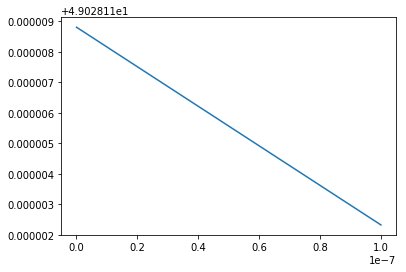

In [16]:
## SVR

from sklearn.model_selection import KFold 
kf = KFold(n_splits=5)
error_list =[]
para_list = []
max_error = 1000
for c in np.logspace(-7,-10,10):
    max_acc = 1000
    for train_index, val_index in kf.split(X_train):
        trainX, valX = X_train[train_index], X_train[val_index]
        trainy, valy = y_train.iloc[train_index], y_train.iloc[val_index]
        
        svr = SVR(C=c, kernel = 'rbf')
        model = svr.fit(trainX,trainy)
        pred_val = model.predict(valX)
        error = mean_absolute_error(pred_val,valy)
        if(error<=max_acc):
            max_acc = error
            optimal_C = c

    svr = SVR(C=optimal_C, kernel = 'rbf')
    model = svr.fit(trainX,trainy)
    pred_val = model.predict(valX)
    error = mean_absolute_error(pred_val,valy)
    error_list.append(error)
    para_list.append(optimal_C)
    print('optimal_C := ', optimal_C,'  MAE= ',error)
    
    if(error<=max_error):
            max_error = error
            optimal_c = optimal_C
            
print()
print()
print('For kfold validation set :')
print('optimal_C := ', optimal_c,'  MAE= ',max_error)

plt.plot(para_list,error_list)
            
svr = SVR(C=optimal_c, kernel = 'rbf')
model = svr.fit(X_train,y_train)
pred_val = model.predict(X_val)
error = mean_absolute_error(pred_val,y_val)
print('For validation set :')
print('optimal_C := ', optimal_c,'  MAE= ',error)
    


optimal_est :=  1   MAE=  58.16831683168317
optimal_est :=  2   MAE=  54.868811881188115
optimal_est :=  3   MAE=  51.01980198019802
optimal_est :=  4   MAE=  52.41955445544554
optimal_est :=  5   MAE=  47.375247524752474
optimal_est :=  6   MAE=  48.75165016501651
optimal_est :=  7   MAE=  47.20226308345121
optimal_est :=  8   MAE=  45.75928217821782
optimal_est :=  9   MAE=  46.25962596259625
optimal_est :=  10   MAE=  45.07871287128713
optimal_est :=  11   MAE=  45.72367236723672
optimal_est :=  12   MAE=  45.804455445544555
optimal_est :=  13   MAE=  46.0997715156131
optimal_est :=  14   MAE=  45.01202263083451
optimal_est :=  15   MAE=  45.96897689768977
optimal_est :=  16   MAE=  43.98329207920792
optimal_est :=  17   MAE=  44.83110075713454
optimal_est :=  18   MAE=  44.02035203520352
optimal_est :=  19   MAE=  44.639656070870245
optimal_est :=  20   MAE=  45.105445544554456
optimal_est :=  21   MAE=  44.77652050919377
optimal_est :=  22   MAE=  44.36251125112511
optimal_est := 

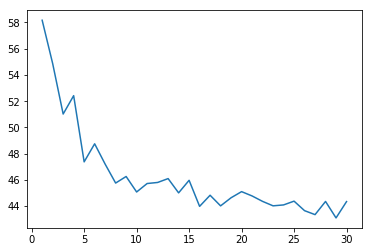

In [17]:
## Random Forest Regressor 

from sklearn.model_selection import KFold 
kf = KFold(n_splits=5)
max_error = 1000
error_list =[]
para_list = []
n_est = np.arange(1,31,1)
for n in n_est:
    max_acc = 1000
    for train_index, val_index in kf.split(X_train):
        trainX, valX = X_train[train_index], X_train[val_index]
        trainy, valy = y_train.iloc[train_index], y_train.iloc[val_index]

        rf = RandomForestRegressor(n_estimators = n)
        model = rf.fit(trainX,trainy)
        pred_val = model.predict(valX)
        error = mean_absolute_error(pred_val,valy)
        if(error<=max_acc):
            max_acc = error
            optimal_est = n

    rf = RandomForestRegressor(n_estimators = optimal_est)
    model = rf.fit(trainX,trainy)
    pred_val = model.predict(valX)
    error = mean_absolute_error(pred_val,valy)
    error_list.append(error)
    para_list.append(optimal_est)
    print('optimal_est := ', optimal_est,'  MAE= ',error)

    if(error<=max_error):
            max_error = error
            optimal_Est = optimal_est

print()
print()
print('For kfold validation set :')
print('optimal_est := ', optimal_Est,'  MAE= ',max_error)

plt.plot(para_list,error_list)
            
rf = RandomForestRegressor(n_estimators = optimal_Est)
model = rf.fit(X_train,y_train)
pred_val = model.predict(X_val)
error = mean_absolute_error(pred_val,y_val)
print('optimal_Est := ', optimal_Est,'  MAE= ',error)

optimal_a :=  1e-05   MAE=  52.1577564461866
optimal_a :=  4.641588833612782e-05   MAE=  52.157756092768444
optimal_a :=  0.00021544346900318823   MAE=  52.15775445235114
optimal_a :=  0.001   MAE=  52.15774683830319
optimal_a :=  0.004641588833612777   MAE=  52.157711499064135
optimal_a :=  0.021544346900318822   MAE=  52.15754890871682
optimal_a :=  0.1   MAE=  52.15679773516685
optimal_a :=  0.46415888336127725   MAE=  52.153330610478214
optimal_a :=  2.154434690031882   MAE=  52.137734716306056
optimal_a :=  10.0   MAE=  52.07989266477602


For kfold validation set :
optimal_alpha :=  10.0   MAE=  52.07989266477602
For validation set :
optimal_alpha :=  10.0   MAE=  51.74735848993796


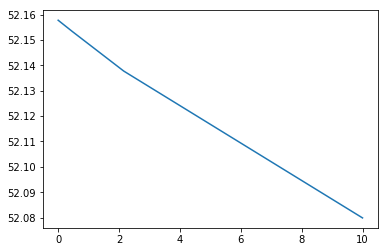

In [18]:
## Ridge Regression

from sklearn.model_selection import KFold 
kf = KFold(n_splits=5)
max_error = 1000
error_list =[]
para_list = []
for a in np.logspace(-5,1,10):
    max_acc = 1000
    for train_index, val_index in kf.split(X_train):
        trainX, valX = X_train[train_index], X_train[val_index]
        trainy, valy = y_train.iloc[train_index], y_train.iloc[val_index]
        
        rd = Ridge(alpha=a)
        model = rd.fit(trainX,trainy)
        pred_val = model.predict(valX)
        error = mean_absolute_error(pred_val,valy)
        if(error<=max_acc):
            max_acc = error
            optimal_a = a

    rd = Ridge(alpha=optimal_a)
    model = rd.fit(trainX,trainy)
    pred_val = model.predict(valX)
    error = mean_absolute_error(pred_val,valy)
    error_list.append(error)
    para_list.append(optimal_a)
    print('optimal_a := ', optimal_a,'  MAE= ',error)
    
    if(error<=max_error):
            max_error = error
            optimal_alpha = optimal_a
            
print()
print()
print('For kfold validation set :')
print('optimal_alpha := ', optimal_alpha,'  MAE= ',max_error)

plt.plot(para_list,error_list)
            
rd = Ridge(alpha=optimal_alpha)
model = rd.fit(X_train,y_train)
pred_val = model.predict(X_val)
error = mean_absolute_error(pred_val,y_val)
print('For validation set :')
print('optimal_alpha := ', optimal_alpha,'  MAE= ',error)

optimal_a :=  1e-05   MAE=  52.15773679845672
optimal_a :=  1.623776739188721e-05   MAE=  52.15772448185268
optimal_a :=  2.6366508987303556e-05   MAE=  52.15770448243754
optimal_a :=  4.281332398719396e-05   MAE=  52.15767200785243
optimal_a :=  6.951927961775606e-05   MAE=  52.15761927637652
optimal_a :=  0.00011288378916846884   MAE=  52.15753367047519
optimal_a :=  0.00018329807108324357   MAE=  52.157395039513744
optimal_a :=  0.00029763514416313193   MAE=  52.15717021189538
optimal_a :=  0.0004832930238571752   MAE=  52.156805142038344
optimal_a :=  0.0007847599703514606   MAE=  52.156212350096304
optimal_a :=  0.0012742749857031334   MAE=  52.15524978832966
optimal_a :=  0.00206913808111479   MAE=  52.15368680292295
optimal_a :=  0.003359818286283781   MAE=  52.151148863575834
optimal_a :=  0.005455594781168515   MAE=  52.147031396657795
optimal_a :=  0.008858667904100823   MAE=  52.14034767895506
optimal_a :=  0.01438449888287663   MAE=  52.1295554429152
optimal_a :=  0.0233572

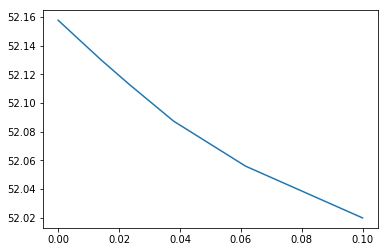

In [19]:
## Lasso Regression

from sklearn.model_selection import KFold 
kf = KFold(n_splits=5)
max_error = 1000
error_list =[]
para_list = []
for a in np.logspace(-5,-1,20):
    max_acc = 1000
    for train_index, val_index in kf.split(X_train):
        trainX, valX = X_train[train_index], X_train[val_index]
        trainy, valy = y_train.iloc[train_index], y_train.iloc[val_index]
        
        ls = Lasso(alpha=a)
        model = ls.fit(trainX,trainy)
        pred_val = model.predict(valX)
        error = mean_absolute_error(pred_val,valy)
        if(error<=max_acc):
            max_acc = error
            optimal_a = a

    ls = Lasso(alpha=optimal_a)
    model = ls.fit(trainX,trainy)
    pred_val = model.predict(valX)
    error = mean_absolute_error(pred_val,valy)
    error_list.append(error)
    para_list.append(optimal_a)
    print('optimal_a := ', optimal_a,'  MAE= ',error)
    
    if(error<=max_error):
            max_error = error
            optimal_alpha = optimal_a
            
print()
print()
print('For kfold validation set :')
print('optimal_alpha := ', optimal_alpha,'  MAE= ',max_error)

plt.plot(para_list,error_list)
            
ls = Lasso(alpha=optimal_alpha)
model = ls.fit(X_train,y_train)
pred_val = model.predict(X_val)
error = mean_absolute_error(pred_val,y_val)
print('For validation set :')
print('optimal_alpha := ', optimal_alpha,'  MAE= ',error)

### Testing

In [20]:
rf = RandomForestRegressor(n_estimators = optimal_Est)
model = rf.fit(X_train,y_train)
pred_val = model.predict(X_test)
error = mean_absolute_error(pred_val,y_test)
print('optimal_Est := ', optimal_Est,'  MAE= ',error)

optimal_Est :=  29   MAE=  41.63143412460964
